# Financial Time Series: the PANDAS Library
Chapter 6 - Python for Finance.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([10,20,30,40], columns=['numbers'], index=['a','b','c','d'])
df

,numbers
a,10
b,20
c,30
d,40


In [3]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [4]:
df.columns

Index(['numbers'], dtype='object')

In [5]:
df.ix['c']

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


numbers    30
Name: c, dtype: int64

In [6]:
df.ix[['a','d']]

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,numbers
a,10
d,40


In [7]:
df.ix[df.index[1:3]]

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,numbers
b,20
c,30


In [8]:
df.sum()

numbers    100
dtype: int64

In [9]:
df.apply(lambda x:x**2)

,numbers
a,100
b,400
c,900
d,1600


In [10]:
df**2

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df['floats'] = (1.5,2.5,3.5,4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [12]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [13]:
df['names'] = pd.DataFrame(['Yves', 'Guido','Felix', 'Francesc'],index=['d','a','b','c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [14]:
df.append({'numbers':100, 'floats': 5.75, 'names': 'Henry'}, ignore_index=True)

#this is a temporary object. df is not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [15]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index =['z',]))

#By appending a dataframe, the index is preserved

In [16]:
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.drop_duplicates(inplace=True)
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


## Dealing with missing data

In [18]:
new_data_df = pd.DataFrame([1, 4, 9, 16, 25], index =['a', 'b', 'c', 'd', 'y'], columns =['squares',]) 
df.join(new_data_df) # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
z,5.75,Henry,100,NaN


In [19]:
new_data_df = pd.DataFrame([1, 4, 9, 16, 25], index =['a', 'b', 'c', 'd', 'y'], columns =['squares',]) 
df = df.join(new_data_df, how='outer') # temporary object

In [20]:
df[['numbers','squares']].mean()

numbers    40
squares    11
dtype: float64

In [21]:
df[['numbers','squares']].std()

numbers    35.355339
squares     9.669540
dtype: float64

## Working with numerical data
Generating a dummy dataset with nine rows and 4 columns of random data.

In [22]:
a = np.random.standard_normal((9,4))
a.round(6)

array([[-0.139925, -0.6553  , -0.494234, -1.201656],
       [-1.724084, -0.543004, -1.205985,  0.445805],
       [-0.225742, -0.825168,  0.24778 , -1.765802],
       [ 1.561295, -1.158412, -0.985166, -0.262847],
       [-0.175999, -0.034417,  1.784506,  0.154799],
       [-1.733556,  0.167132,  0.99757 , -1.035692],
       [-0.904751,  1.636814,  1.549339, -0.325005],
       [-0.696344,  0.361184, -0.458277, -0.32416 ],
       [-0.775179, -0.727072,  0.242922, -1.259074]])

In [23]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.139925,-0.655300,-0.494234,-1.201656
1,-1.724084,-0.543004,-1.205985,0.445805
2,-0.225742,-0.825168,0.247780,-1.765802
3,1.561295,-1.158412,-0.985166,-0.262847
4,-0.175999,-0.034417,1.784506,0.154799
5,-1.733556,0.167132,0.997570,-1.035692
6,-0.904751,1.636814,1.549339,-0.325005
7,-0.696344,0.361184,-0.458277,-0.324160
8,-0.775179,-0.727072,0.242922,-1.259074


In [24]:
df.columns = [['No1','No2','No3','No4']]
df

,No1,No2,No3,No4
0,-0.139925,-0.655300,-0.494234,-1.201656
1,-1.724084,-0.543004,-1.205985,0.445805
2,-0.225742,-0.825168,0.247780,-1.765802
3,1.561295,-1.158412,-0.985166,-0.262847
4,-0.175999,-0.034417,1.784506,0.154799
5,-1.733556,0.167132,0.997570,-1.035692
6,-0.904751,1.636814,1.549339,-0.325005
7,-0.696344,0.361184,-0.458277,-0.324160
8,-0.775179,-0.727072,0.242922,-1.259074


In [25]:
df['No2'][3]

-1.1584119492805847

## Dates

In [26]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [27]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,-0.139925,-0.655300,-0.494234,-1.201656
2015-02-28,-1.724084,-0.543004,-1.205985,0.445805
2015-03-31,-0.225742,-0.825168,0.247780,-1.765802
2015-04-30,1.561295,-1.158412,-0.985166,-0.262847
2015-05-31,-0.175999,-0.034417,1.784506,0.154799
2015-06-30,-1.733556,0.167132,0.997570,-1.035692
2015-07-31,-0.904751,1.636814,1.549339,-0.325005
2015-08-31,-0.696344,0.361184,-0.458277,-0.324160
2015-09-30,-0.775179,-0.727072,0.242922,-1.259074


In [28]:
np.array(df).round(6)

array([[-0.139925, -0.6553  , -0.494234, -1.201656],
       [-1.724084, -0.543004, -1.205985,  0.445805],
       [-0.225742, -0.825168,  0.24778 , -1.765802],
       [ 1.561295, -1.158412, -0.985166, -0.262847],
       [-0.175999, -0.034417,  1.784506,  0.154799],
       [-1.733556,  0.167132,  0.99757 , -1.035692],
       [-0.904751,  1.636814,  1.549339, -0.325005],
       [-0.696344,  0.361184, -0.458277, -0.32416 ],
       [-0.775179, -0.727072,  0.242922, -1.259074]])

## Basic Analytics

Column wise operations:

In [29]:
df.sum()

No1   -4.814286
No2   -1.778243
No3    1.678456
No4   -5.573632
dtype: float64

In [30]:
df.mean()

No1   -0.534921
No2   -0.197583
No3    0.186495
No4   -0.619292
dtype: float64

In [31]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,-0.139925,-0.655300,-0.494234,-1.201656
2015-02-28,-1.864010,-1.198304,-1.700219,-0.755851
2015-03-31,-2.089751,-2.023472,-1.452438,-2.521653
2015-04-30,-0.528456,-3.181884,-2.437604,-2.784500
2015-05-31,-0.704456,-3.216301,-0.653098,-2.629701
2015-06-30,-2.438012,-3.049169,0.344472,-3.665393
2015-07-31,-3.342763,-1.412355,1.893811,-3.990398
2015-08-31,-4.039107,-1.051171,1.435534,-4.314557
2015-09-30,-4.814286,-1.778243,1.678456,-5.573632


In [32]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.534921,-0.197583,0.186495,-0.619292
std,0.990325,0.848757,1.076260,0.730646
min,-1.733556,-1.158412,-1.205985,-1.765802
25%,-0.904751,-0.727072,-0.494234,-1.201656
50%,-0.696344,-0.543004,0.242922,-0.325005
75%,-0.175999,0.167132,0.997570,-0.262847
max,1.561295,1.636814,1.784506,0.445805


In [33]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,0.667686
2015-03-31,NaN,NaN,0.497775,NaN
2015-04-30,1.249518,NaN,NaN,NaN
2015-05-31,NaN,NaN,1.335854,0.393445
2015-06-30,NaN,0.408818,0.998784,NaN
2015-07-31,NaN,1.279380,1.244724,NaN
2015-08-31,NaN,0.600986,NaN,NaN
2015-09-30,NaN,NaN,0.492871,NaN


In [34]:
np.sqrt(df).sum()

No1    1.249518
No2    2.289184
No3    4.570010
No4    1.061131
dtype: float64

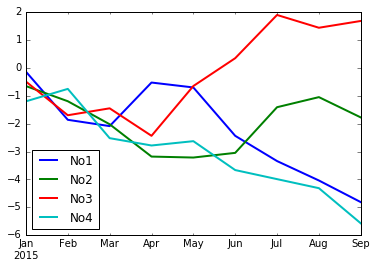

In [35]:
%matplotlib inline
df.cumsum().plot(lw=2.0)

## Series Class

In [36]:
type(df['No1'])

pandas.core.series.Series

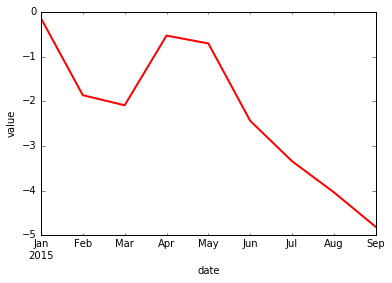

In [37]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r',lw=2.)
plt.xlabel('date')
plt.ylabel('value')

## Group By Operations

To have something to group by, we'll add a "quarter" variable.

In [38]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.139925,-0.655300,-0.494234,-1.201656,Q1
2015-02-28,-1.724084,-0.543004,-1.205985,0.445805,Q1
2015-03-31,-0.225742,-0.825168,0.247780,-1.765802,Q1
2015-04-30,1.561295,-1.158412,-0.985166,-0.262847,Q2
2015-05-31,-0.175999,-0.034417,1.784506,0.154799,Q2
2015-06-30,-1.733556,0.167132,0.997570,-1.035692,Q2
2015-07-31,-0.904751,1.636814,1.549339,-0.325005,Q3
2015-08-31,-0.696344,0.361184,-0.458277,-0.324160,Q3
2015-09-30,-0.775179,-0.727072,0.242922,-1.259074,Q3


In [39]:
groups = df.groupby('Quarter')

In [40]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.696584,-0.674491,-0.484146,-0.840551
Q2,-0.116087,-0.341899,0.598970,-0.381247
Q3,-0.792091,0.423642,0.444661,-0.636080


In [41]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.139925,-0.543004,0.247780,0.445805
Q2,1.561295,0.167132,1.784506,0.154799
Q3,-0.696344,1.636814,1.549339,-0.324160


In [42]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

### Grouping by multiple columns

In [43]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']

In [44]:
groups = df.groupby(['Quarter','Odd_Even'])

In [45]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [46]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.724084 -0.543004 -1.205985  0.445805
        Odd      -0.182834 -0.740234 -0.123227 -1.483729
Q2      Even     -0.086131 -0.495640  0.006202 -0.649269
        Odd      -0.175999 -0.034417  1.784506  0.154799
Q3      Even     -0.696344  0.361184 -0.458277 -0.324160
        Odd      -0.839965  0.454871  0.896131 -0.792040

## Financial Data

In [1]:
from pandas_datareader import data as web

In [2]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo', start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
d=document                                                                                                                                 0 non-null object
e=d.documentElement                                                                                                                        0 non-null object
b=d.body                                                                                                                                   0 non-null object
x=w.innerWidth||e.clientWidth||b.clientWidth                                                                                               0 non-null object
y=w.innerHeight||e.clientHeight||b.clientHeight;url+="&w="+x+"&h="+y;}window.location.replace(url);</script></head><body></body></html>    0 non-null object
dtypes: object(5)
memory usage: 0.0+ bytes


In [50]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-08-12,10718.330078,10735.110352,10685.519531,10713.429688,58650500,10713.429688
2016-08-15,10719.139648,10802.320312,10712.129883,10739.209961,41626500,10739.209961
2016-08-16,10666.719727,10737.070312,10634.679688,10676.650391,61912700,10676.650391
2016-08-17,10694.549805,10696.759766,10516.049805,10537.669922,66557600,10537.669922
2016-08-18,10613.080078,10625.330078,10548.969727,10603.030273,53771500,10603.030273


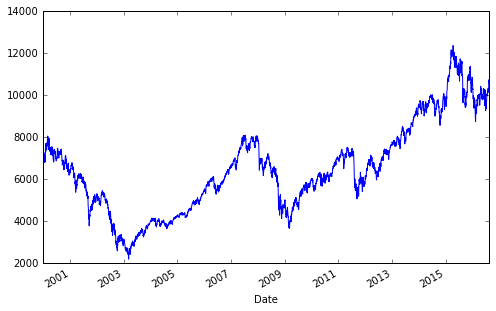

In [51]:
DAX['Close'].plot(figsize=(8,5))

### Calculating log returns using a loop

In [52]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i]/DAX['Close'][i-1])

C:\Users\tttri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Wall time: 2min 51s


### Calculating log returns using vectorized code

In [53]:
%time DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1))

Wall time: 2.01 ms


In [54]:
DAX[['Close','Ret_Loop','Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2016-08-12,10713.429688,-0.002741,-0.002741
2016-08-15,10739.209961,0.002403,0.002403
2016-08-16,10676.650391,-0.005842,-0.005842
2016-08-17,10537.669922,-0.013103,-0.013103
2016-08-18,10603.030273,0.006183,0.006183


In [55]:
del DAX['Ret_Loop']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FD6EF4A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000208FD750080>], dtype=object)

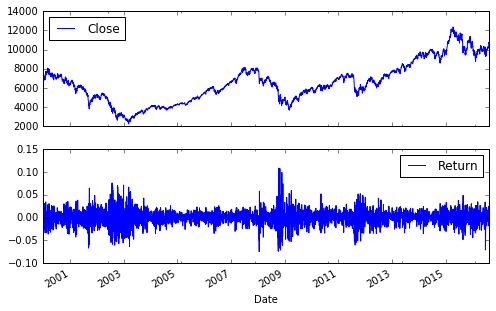

In [56]:
DAX[['Close','Return']].plot(subplots=True, style = 'b', figsize=(8,5))

In [57]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window = 42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window = 252) 
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2016-08-12,10713.429688,10016.581892,10082.575835
2016-08-15,10739.209961,10044.885231,10081.874605
2016-08-16,10676.650391,10069.773089,10081.852779
2016-08-17,10537.669922,10083.479050,10082.271349
2016-08-18,10603.030273,10097.466913,10084.170201


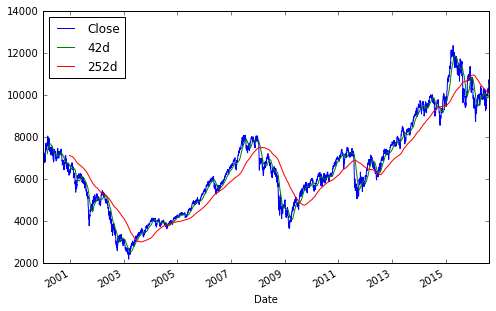

In [58]:
DAX[['Close', '42d', '252d']].plot(figsize=(8,5))

In [59]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],window=252)*math.sqrt(252) # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FD8AE9E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000208FD986908>], dtype=object)

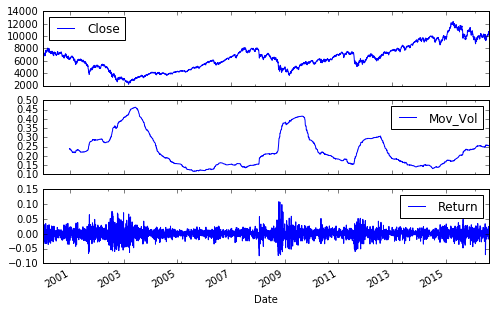

In [60]:
DAX[['Close','Mov_Vol','Return']].plot(subplots=True, style = 'b', figsize=(8,5))

## Regression Analysis

Using Linear Ordinary Least Squares (OLS) regression to compare EURO STOXX50 to VSTOXX, a volatility index.

In [61]:
from urllib import request

In [62]:
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt' 
vs_url = 'http://www.stoxx.com/download/historical_values/h_vstoxx.txt' 

request.urlretrieve(es_url, './data/es.txt')
request.urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <http.client.HTTPMessage at 0x208fda7dc88>)

In [63]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]
lines

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n',
 '06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06\n',
 '07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20\n',
 '08.01.1987;777.62;887.37;83.52;97.87;97.68;71.01;645.57;65.62\n',
 '09.01.1987;769.80;868.31;83.03;96.31;96.22;71.40;638.03;65.14\n',
 '12.01.1987;775.07;879.41;83.64;97.54;97.18;71.50;634.14;65.03\n',
 '13.01.1987;770.00;872.74;83.00;96.78;96.38;70.97;622.44;63.87\n',
 '14.01.1987;772.04;876.39;82.99;97.14;96.59;70.66;603.63;62.46\n',
 '15.01.1987;779.12;884.37;83.77;98.10;97

In [64]:
lines[:5]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [65]:
for line in lines[ 3883: 3890]: print(line[ 41:])

317.10;267.23;5268.36;363.19

322.55;272.18;5360.52;370.94

322.69;272.95;5360.52;370.94

327.57;277.68;5479.59;378.69;

329.94;278.87;5585.35;386.99;

326.77;272.38;5522.25;380.09;

332.62;277.08;5722.57;396.12;



To make the data set easier to import, we do the following: 
* Generate a new text file. 
* Delete unneeded header lines. 
* Write an appropriate new header line to the new file. 
* Add a helper column, DEL (to catch the trailing semicolons). 
* Write all data rows to the new file.

In [66]:
new_file = open('./data/es50.txt','w') # opens a new file
new_file.writelines('date' + lines[3][:-1] + ';DEL' + lines[3][-1]) # writes the corrected 3rd line of the file as a new line
# the ';DEL' column is a helper column to catch the trailing semi-colons
new_file.writelines(lines[4:]) # writes the remaining lines of the original file
new_file.close()

In [67]:
new_lines = open('./data/es50.txt','r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [68]:
es = pd.read_csv('./data/es50.txt', index_col=0,parse_dates=True,sep=';',dayfirst=True)

In [69]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-04-26,2923,3121,347,330,412,354,9395,588,NaN
2016-04-27,2927,3130,348,332,413,354,9424,589,NaN
2016-04-28,2932,3125,349,332,414,355,9459,592,NaN
2016-04-29,2856,3028,341,324,405,349,9278,582,NaN
2016-05-02,2852,3033,341,324,405,348,9238,579,NaN


In [70]:
del es['DEL']
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7562 entries, 1986-12-31 to 2016-05-02
Data columns (total 8 columns):
SX5P    7562 non-null float64
SX5E    7562 non-null float64
SXXP    7562 non-null float64
SXXE    7562 non-null float64
SXXF    7562 non-null float64
SXXA    7562 non-null float64
DK5F    7562 non-null float64
DKXF    7562 non-null float64
dtypes: float64(8)
memory usage: 531.7 KB


Another way to import the data:

In [71]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF'] 
es = pd.read_csv(es_url, index_col = 0, parse_dates = True, sep =';', dayfirst = True, header = None, skiprows = 4, names = cols)
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [72]:
vs = pd.read_csv('./data/vs.txt', index_col = 0, header = 2, parse_dates = True, sep =',', dayfirst = True) 
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


### Implementing the regression analysis
We only need one column from each data set and the dates have to line up. To do that, we start the data on 1/1/99.

In [73]:
import datetime as dt 
data = pd.DataFrame({'EUROSTOXX': es['SX5E'][es.index > dt.datetime(1999, 1, 1)]}) 
data = data.join(pd.DataFrame({'VSTOXX': vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))
data.head()

,EUROSTOXX,VSTOXX
1999-01-04,3543.10,18.2033
1999-01-05,3604.67,29.6912
1999-01-06,3685.36,25.1670
1999-01-07,3627.87,32.5205
1999-01-08,3616.57,33.2296


In [74]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [75]:
data.tail()

,EUROSTOXX,VSTOXX
2016-04-26,3121.29,35.6846
2016-04-27,3130.43,35.6846
2016-04-28,3125.43,35.6846
2016-04-29,3028.21,35.6846
2016-05-02,3032.60,35.6846


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002088007F978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000020880B1E630>], dtype=object)

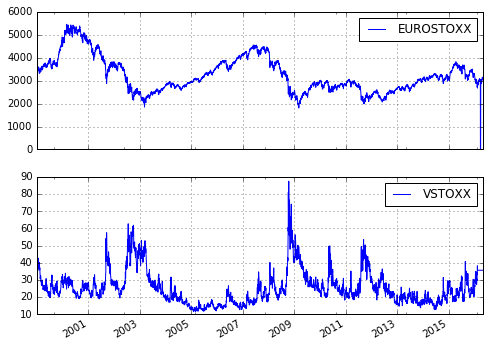

In [76]:
data.plot(subplots=True, grid=True , style='b', figsize=(8,6))

In [77]:
rets = np.log(data / data.shift(1))
rets.head()

# Drop bad data
rets = rets.replace([np.inf, -np.inf], np.nan)
rets = rets.dropna()
rets.head()

,EUROSTOXX,VSTOXX
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
1999-01-11,-0.019593,0.103173


Using the EURO STOXX50 as the independent variable, we create a regression  for the VSTOXX returns:

In [78]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']

model = pd.ols(y=ydat,x=xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4439
Number of Degrees of Freedom:   2

R-squared:         0.5376
Adj R-squared:     0.5375

Rmse:              0.0394

F-stat (1, 4437):  5157.9648, p-value:     0.0000

Degrees of Freedom: model 1, resid 4437

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8169     0.0392     -71.82     0.0000    -2.8937    -2.7400
     intercept     0.0000     0.0006       0.08     0.9338    -0.0011     0.0012
---------------------------------End of Summary---------------------------------

### Plot the regression

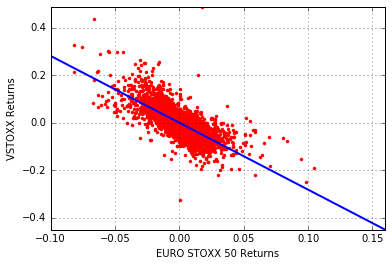

In [79]:
plt.plot(xdat,ydat,'r.')
ax = plt.axis() # grab axis values
x = np.linspace(ax[0],ax[1]+0.01)
plt.plot(x, model.beta[1] + model.beta[0]*x,'b',lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 Returns')
plt.ylabel('VSTOXX Returns')

In [80]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.733192
VSTOXX,-0.733192,1.000000


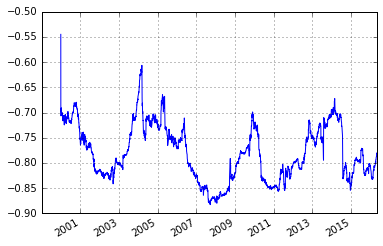

In [81]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'], window=252).plot(grid=True, style='b')

## High Frequency Data
The Norwegian online broker Netfonds provides tick data for a multitude of stocks, in particular for American names. The web-based API has basically the following format: 

For some reason AAPL.O is not working. Switched to NKE and it works.

In [152]:
# http://hopey.netfonds.no/tradedump.php?date=20160818&paper=AAPL.O&csv_format=txt
# http://hopey.netfonds.no/posdump.php?date=20120423&paper=AAPL.O&csv_format=txt

# url1 = 'http://www.netfonds.no/quotes/paperhistory.php?'
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv' 
url = url1 + url2
year = '2016'
month = '08'
days = ['15','16','17','18']

In [153]:
for day in days:
    print(url % (year, month, day))

http://www.netfonds.no/quotes/posdump.php?date=20160815&paper=NKE.N&csv_format=csv
http://www.netfonds.no/quotes/posdump.php?date=20160816&paper=NKE.N&csv_format=csv
http://www.netfonds.no/quotes/posdump.php?date=20160817&paper=NKE.N&csv_format=csv
http://www.netfonds.no/quotes/posdump.php?date=20160818&paper=NKE.N&csv_format=csv


In [155]:
NKE = pd.DataFrame() 
for day in days: 
    NKE = NKE.append(pd.read_csv( url % (year, month, day), index_col = 0, header = 0, parse_dates = True)) 

NKE.columns=['bid','bdepth','bdeptht','offer','offer','odepth']
# shorter colummn names

NKE.head()

,bid,bdepth,bdeptht,offer,offer,odepth
time,,,,,,
2016-08-15 10:00:01,55.98,100,100,57.23,100,100
2016-08-15 10:00:09,55.57,200,200,57.68,100,100
2016-08-15 10:01:01,55.78,100,100,57.48,100,100
2016-08-15 10:36:59,55.78,100,100,56.69,100,100
2016-08-15 14:07:12,56.45,300,300,56.69,100,100


In [156]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36901 entries, 2016-08-15 10:00:01 to 2016-08-18 22:15:17
Data columns (total 6 columns):
bid        36901 non-null float64
bdepth     36901 non-null int64
bdeptht    36901 non-null int64
offer      36901 non-null offer    float64
offer      int64
dtype: object
offer      36901 non-null offer    float64
offer      int64
dtype: object
odepth     36901 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.0 MB


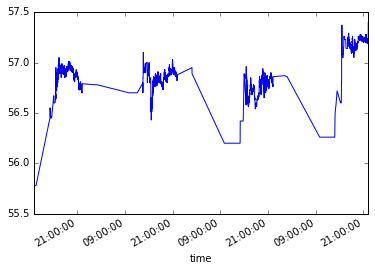

In [157]:
NKE['bid'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020883A729E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000020883EA2F98>], dtype=object)

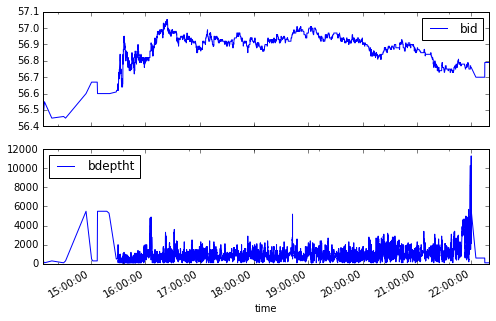

In [162]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index>dt.datetime(2016, 8, 15, 14, 0)) 
    & (NKE.index < dt.datetime(2016, 8, 15, 23, 59))] 
# adjust dates to given data set 
to_plot.plot(subplots = True, style ='b', figsize =( 8, 5))

In [163]:
NKE_resam = NKE.resample(rule ='5min', how ='mean') 
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,offer,odepth
time,,,,,,
2016-08-15 10:00:00,55.78,133.33,133.33,57.46,100,100
2016-08-15 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-15 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-15 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-15 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN


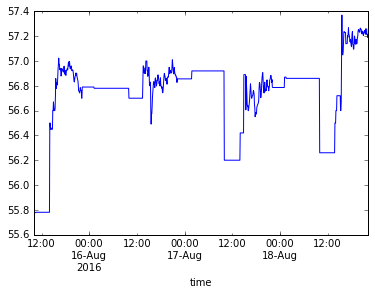

In [164]:
NKE_resam['bid'].fillna(method='ffill').plot()